## PCA, the instance of the eigen-analysis
1. PCA seeks to represent observations (or signals, images, and general data) in
a form that enhances the mutual independence of contributory components.

2. One observation is assumed to be a point in a p-dimensional linear space.

3. This linear space has some ‘natural’ orthogonal basis vectors. It is of
advantage to express observation as a linear combination with regards to
this ‘natural’ base (given by eigen-vectors as we will see later).

4. PCA is mathematically defined as an orthogonal linear transformation that
transforms the data to a new coordinate system such that the greatest
variance by some projection of the data comes to lie on the first coordinate
(called the first principal component), the second greatest variance on the
second coordinate, and so on.

In [171]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

oli=datasets.fetch_olivetti_faces()
digits=datasets.load_digits()

## Using PCA for images


Let us consider a 64 × 64 image.


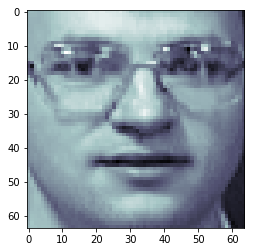

In [172]:
plt.imshow(oli.images[50],cmap=plt.cm.bone)
plt.show()

1. The image is considered as a very long 1D vector by concatenating image
pixels column by column (or alternatively row by row), i.e.
64 × 64 = 4096.
2. The huge number 4096 is the dimensionality of our vector space.
3. The intensity variation is assumed in each pixel of the image.


## What if we have 10 instances of images?

   Fewer observations than unknowns
1. We have only 10 observations and 4096 unknowns in our example!
2. The induced system of linear equations is not over-constrained but
under-constrained.
3. PCA is still applicable.
4. The number of principle components is less than or equal to the number of
observations available (10 in our particular case). This is because the
(square) covariance matrix has a size corresponding to the number of
observations.
5. The eigen-vectors we derive are called eigen-images, after rearranging back
from the 1D vector to a rectangular image.

## PCA drawbacks, the images case
1. By rearranging pixels column by column to a 1D vector, relations of a given
pixel to pixels in neighboring rows are not taken into account.

2. Another disadvantage is in the global nature of the representation; small
change or error in the input images influences the whole eigen-representation.
However, this property is inherent in all linear integral transforms.

# Applying PCA on images

In [173]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [174]:
oli=datasets.fetch_olivetti_faces()
digits=datasets.load_digits()

In [175]:
oli.images[0].shape

(64, 64)

In [176]:
digits.data.shape

(1797, 64)

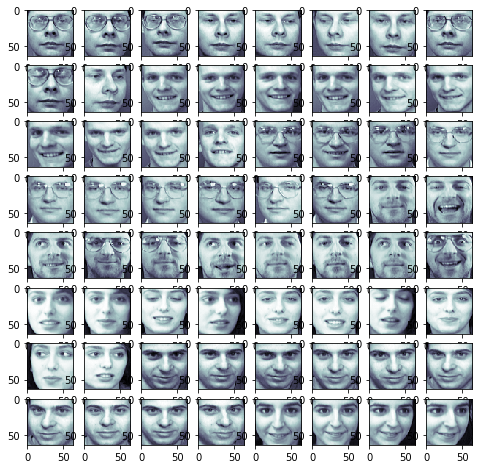

In [177]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)# rows and columns and image number starting from 1
    ax.imshow(oli.images[i+30],cmap=plt.cm.bone)
plt.show()

In [178]:
x=oli.data
y=oli.target


In [179]:
pca=PCA()

In [180]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [181]:
pca.components_.shape #min of rows or column

(400, 4096)

In [182]:
k=0
total=0
while total<0.95:
    total+=pca.explained_variance_ratio_[k]
    k+=1
k

123

In [183]:
pca2=PCA(n_components=k,whiten=True) #whiten works eqivalent to feature scaling in these k features
transformed=pca2.fit_transform(x)

In [184]:
transformed.shape

(400, 123)

In [185]:
x_approx=pca2.inverse_transform(transformed)
x_approx.shape
x_approx=x_approx.reshape((400,64,64))

In [186]:
x_approx.shape

(400, 64, 64)

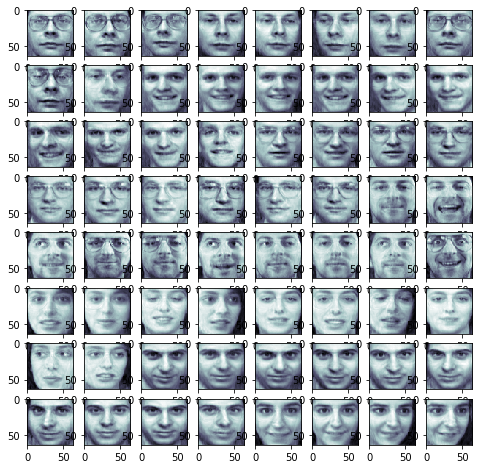

In [187]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)# rows and columns and image number starting from 1
    ax.imshow(x_approx[i+30],cmap=plt.cm.bone)
plt.show()

In [188]:
#each eigen face will represent a particular feature of image

In [189]:
eigv=pca2.components_
eigv.shape

(123, 4096)

In [190]:
eigv=eigv.reshape((123,64,64))

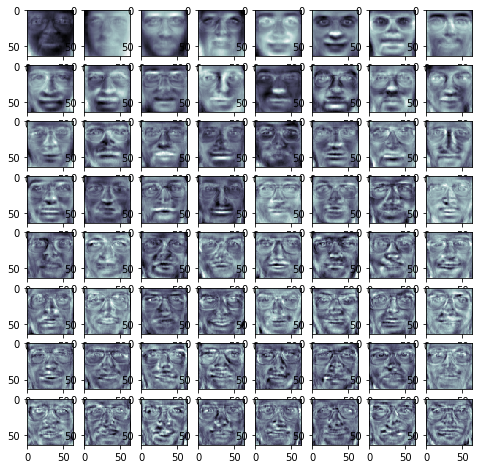

In [191]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)# rows and columns and image number starting from 1
    ax.imshow(eigv[i],cmap=plt.cm.bone)
plt.show()

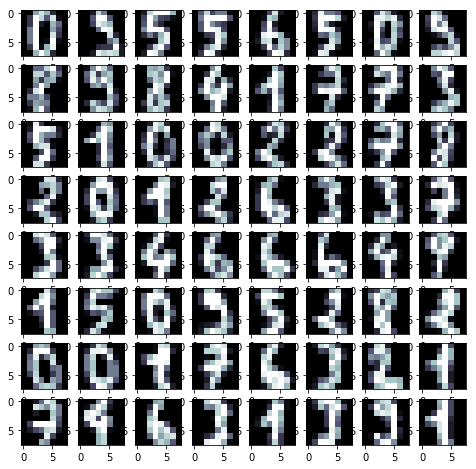

In [192]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)# rows and columns and image number starting from 1
    ax.imshow(digits.images[i+30],cmap=plt.cm.bone)
plt.show()

In [193]:
x=digits.data
pca=PCA()
pca.fit(x)
pca.components_.shape #min of rows or column

(64, 64)

In [194]:
k=0
total=0
while total<0.99:
    total+=pca.explained_variance_ratio_[k]
    k+=1
k


41

In [195]:
pca2=PCA(n_components=k,whiten=True) # works eqivalent to feature scaling in these k features
transformed=pca2.fit_transform(x)
transformed.shape

(1797, 41)

In [196]:
x_approx=pca2.inverse_transform(transformed)
x_approx.shape
x_approx=x_approx.reshape((1797,8,8))

x_approx.shape

(1797, 8, 8)

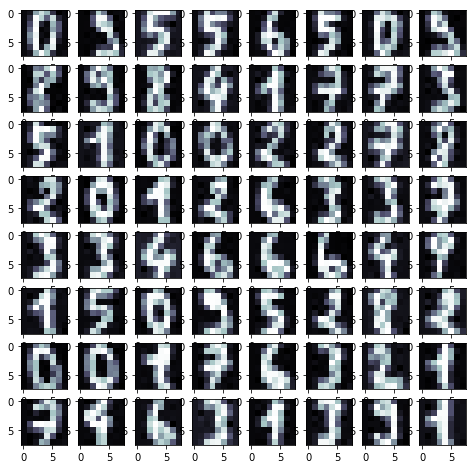

In [197]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)# rows and columns and image number starting from 1
    ax.imshow(x_approx[i+30],cmap=plt.cm.bone)
plt.show()

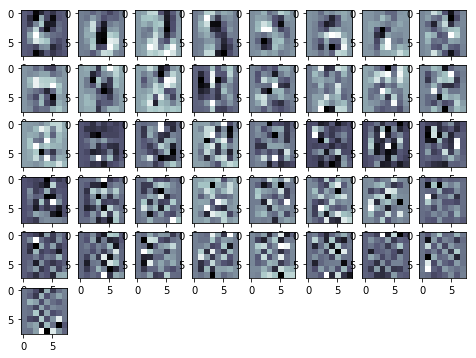

In [198]:
#eigen faces for digits
eigv=pca2.components_
eigv.shape

eigv=eigv.reshape((41,8,8))

fig=plt.figure(figsize=(8,8))
for i in range(41):
    ax=fig.add_subplot(8,8,i+1)# rows and columns and image number starting from 1
    ax.imshow(eigv[i],cmap=plt.cm.bone)
plt.show()



## PCA Use for Image Compression

Data volume reduction is a common task in image processing. There is a huge amount of
algorithms [1, 2, 4] based on various principles leading to the image compression. Algorithms
based on the image colour reduction are mostly lossy but their results are still acceptable for
some applications. The image transformation from colour to the gray-level (intensity) image I
belongs to the most common algorithms. Its implementation is usually based on the weighted
sum of three colour components R, G, B according to relation:

                        I = w1R + w2G + w3B 

The R, G and B matrices contain image colour components, the weights wi were determined
with regards to the possibilities of human perception. The PCA method provides an
alternative way to this method. The idea is that matrix A is replaced by
matrix Al in which only l largest (instead of n) eigenvalues are used for its forming. 


True-colour images of size MxN are usually saved in the three-dimensional matrix P with
size M x N x 3 which means that the information about intensity of colour components is
stored in the 3 given planes. The idea is to apply PCA on the 3rd dimension i.e one containing the information about color in image.




In [199]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#https://matplotlib.org/users/image_tutorial.html

In [200]:
img = mpimg.imread('test2.png')#loading image in numpy array; you can run the code for your own image also, just change the name 
print(type(img),img.shape)

<class 'numpy.ndarray'> (449, 498, 4)


In [201]:
temp=img.copy()
img_shape=img.shape
temp=temp.reshape((img_shape[0]*img_shape[1],4)) #reshaping the image

In [202]:
pca=PCA(n_components=1,whiten=True) #applying PCA
xtr=pca.fit(temp)
xtr=pca.transform(temp)
xtr.shape

(223602, 1)

In [203]:
xtr=xtr.reshape((img_shape[0],img_shape[1]))

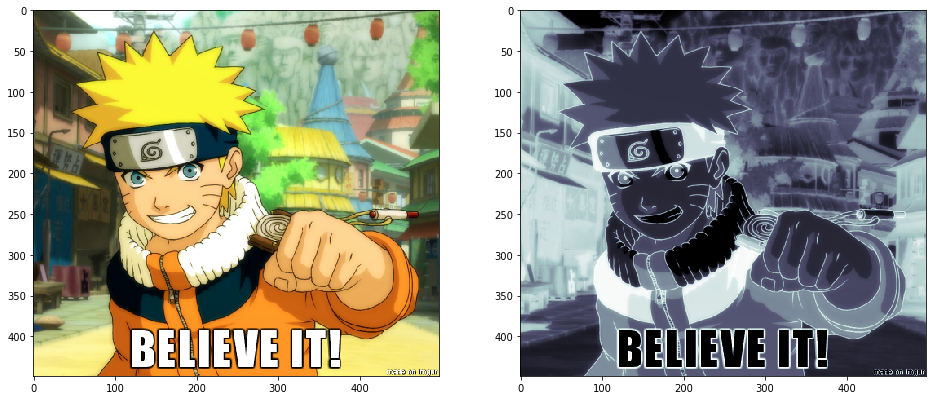

In [204]:
fig=plt.figure(figsize=(16,16))
ax=fig.add_subplot(2,2,1)                      # rows and columns and image number starting from 1
ax.imshow(img,cmap=plt.cm.bone)
ax=fig.add_subplot(2,2,2)
ax.imshow(xtr,cmap=plt.cm.bone)
plt.show()